## Problem 1: Clustering
The dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.

#### Dataset for Problem 1: State_wise_Health_income.csv

### Data Dictionary for State_wise_Health_income:
1. States: names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into
a single score that provides a summary of how the health system is performing in the
State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a
single score that provides a summary of how the health system is performing in
certain areas of the States.
4. Per_capita_income-Per capita income (PCI) measures the average income earned per
person in a given area (city, region, country, etc.) in a specified year. It is calculated by
dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the
size of an economy and growth rate.



In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

## 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, etc, etc)

In [2]:
df = pd.read_csv('Downloads/State_wise_Health_income-1 (2).csv')
df.head()

,Unnamed: 0,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         297 non-null    int64 
 1   States             297 non-null    object
 2   Health_indeces1    297 non-null    int64 
 3   Health_indices2    297 non-null    int64 
 4   Per_capita_income  297 non-null    int64 
 5   GDP                297 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 14.0+ KB


In [4]:
df.shape

(297, 6)

In [5]:
df.isnull().sum()

Unnamed: 0           0
States               0
Health_indeces1      0
Health_indices2      0
Per_capita_income    0
GDP                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['Unnamed: 0'],axis = 1, inplace =True)
df.head()

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823
1,Balgarchevo,1485,646,2710,73662
2,Belasitsa,654,299,1104,27318
3,Belo_Pole,192,25,573,250
4,Beslen,43,8,528,22


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indeces1,297.0,2630.151515,2038.505431,-10.0,641.0,2451.0,4094.0,10219.0
Health_indices2,297.0,693.632997,468.944354,0.0,175.0,810.0,1073.0,1508.0
Per_capita_income,297.0,2156.915825,1491.854058,500.0,751.0,1865.0,3137.0,7049.0
GDP,297.0,174601.117845,167167.992863,22.0,8721.0,137173.0,313092.0,728575.0


Here, we can see that minimum per capita income is 500, Average is 1865 & maximum is 7049 naturally GDP will follow as per the per capita income is for minimum GDP we can see its 22 for average its 1,37,173 and max is 7,28,575. So , from here only we can see that atleast 3 clusters can be formed one with the minimum per capita income & GDP, Second with average per capita income & GDP and third with the maximum per capita income & GDP. Health indeces 1 tell us about, how the health system is performing in the State and Health indeces 2 tell us about, how the health system is performing in certain areas of the State. From,
description we can see then minimum section is not performing well, average one is performing accordingly and the max is working at its best. Ofcourse, every category is influencing each other indirectly. 

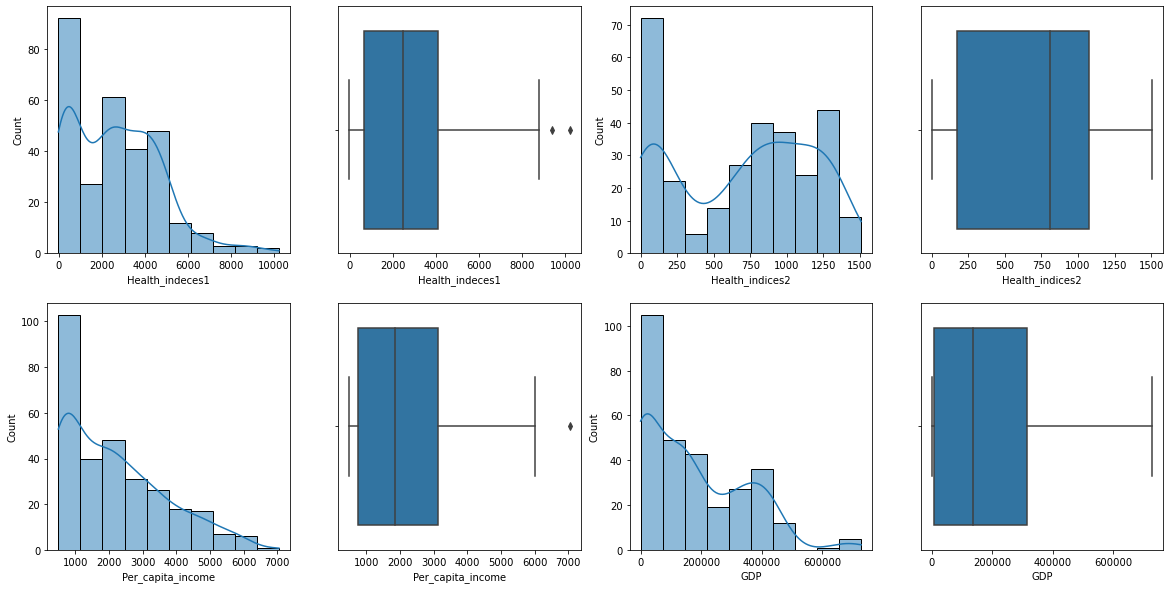

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=4)
fig.set_size_inches(20,10)
sns.histplot(df['Health_indeces1'], kde=True, ax=axes[0][0]);
sns.boxplot(x='Health_indeces1', data=df, ax=axes[0][1]);
sns.histplot(df['Health_indices2'], kde=True, ax=axes[0][2]);
sns.boxplot(x='Health_indices2', data=df, ax=axes[0][3]);
sns.histplot(df['Per_capita_income'], kde=True, ax=axes[1][0]);
sns.boxplot(x='Per_capita_income', data=df, ax=axes[1][1]);
sns.histplot(df['GDP'], kde=True, ax=axes[1][2]);
sns.boxplot(x='GDP', data=df, ax=axes[1][3]);

Health indeces 1 and per capita income are having outliers with them but the other two i.e. health indeces 2 and GDP are not having any outliers in them. Also, three categories are right tailed or can say skewed

1.healt indeces 1

2.Per capita income

3.GDP.

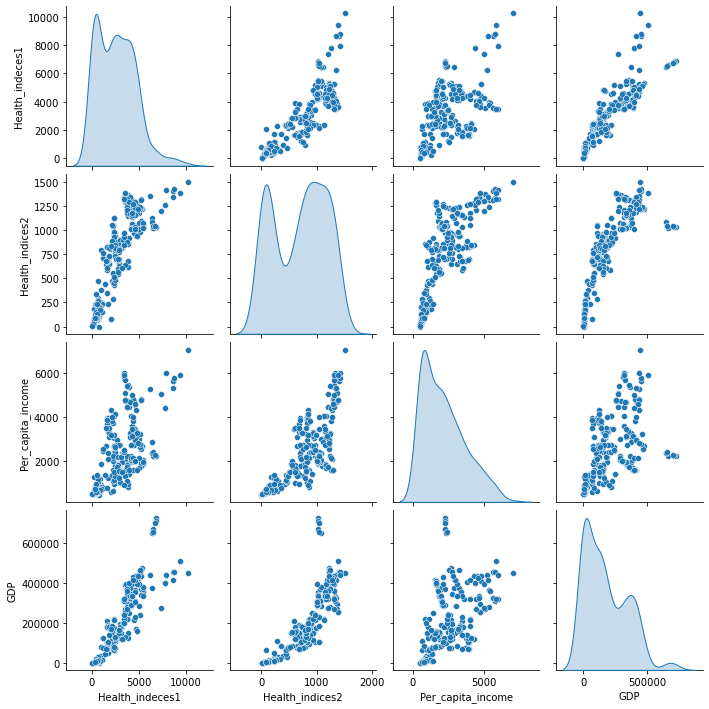

In [10]:
sns.pairplot(df, diag_kind='kde');

Every category have a positive correlation with each other.

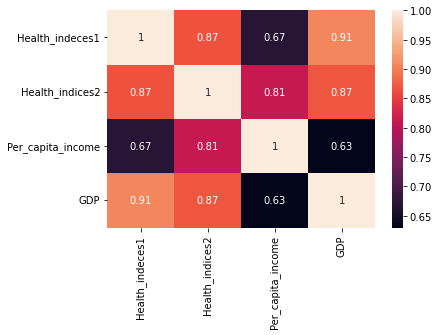

In [11]:
sns.heatmap(df.corr(), annot = True, fmt='.2g');

Every variable is affecting each other in some or the other way. Thus, having high correlation between them.There is an average relationship between per capita income and GDP & Health indeces 1. 

## 1.2. Do you think scaling is necessary for clustering in this case? Justify

#### Why Scaling is important ?

It controls the variability of the dataset, it convert data into specific range using a linear transformation which generate good quality clusters and improve the accuracy of clustering algorithms.

In [12]:
x = StandardScaler()
df1 = x.fit_transform(df.iloc[:,1:5])
df1

array([[-1.08750595, -1.34065436, -1.06954449, -1.03530421],
       [-0.56270846, -0.10174638,  0.37136183, -0.60483755],
       [-0.97104808, -0.84295512, -0.70696788, -0.88253555],
       ...,
       [ 0.31735924, -0.18078016, -0.42630672, -0.32607295],
       [ 0.40924793,  0.32759932, -0.82111237,  0.14861542],
       [-0.27524917,  0.30837488,  0.68626633, -0.04694284]])

In [13]:
df2 = pd.DataFrame(df1,index = df.index[:] ,columns = df.columns[1:5])
df2.head()

,Health_indeces1,Health_indices2,Per_capita_income,GDP
0,-1.087506,-1.340654,-1.069544,-1.035304
1,-0.562708,-0.101746,0.371362,-0.604838
2,-0.971048,-0.842955,-0.706968,-0.882536
3,-1.198067,-1.428232,-1.063502,-1.044730
4,-1.271283,-1.464545,-1.093716,-1.046096


## 1.3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

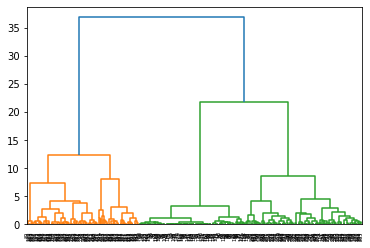

In [14]:
HClust = linkage(df1,method = 'ward')
dend = dendrogram(HClust)

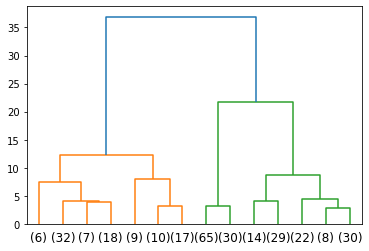

In [15]:
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 14,
                 )

In [16]:
cluster = fcluster(HClust, 3, criterion='maxclust')
cluster

array([2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 1, 2, 2, 2, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 1, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2,
       2, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 2,
       2, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int3

Even though it seems like we are getting 2 clusters i'm choosing 3 as we can already see in our descripyive data that 3 groups can bs formed according to the per capita income and GDP. So, for this reason im choosing 3 clusters here.

In [17]:
df['H_Clusters'] = cluster
df.head(10)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,H_Clusters
0,Bachevo,417,66,564,1823,2
1,Balgarchevo,1485,646,2710,73662,3
2,Belasitsa,654,299,1104,27318,2
3,Belo_Pole,192,25,573,250,2
4,Beslen,43,8,528,22,2
5,Bogolin,69,14,527,73,2
6,Bogoroditsa,307,69,707,1724,2
7,Buchino,10219,1508,7049,449003,1
8,Budiltsi,744,115,809,7497,2
9,Cherniche,2975,857,1600,153299,3


In [18]:
df['H_Clusters'].value_counts().sort_index()

1     99
2     95
3    103
Name: H_Clusters, dtype: int64

99 States comes in cluster 1, 95 States comes in cluster 2 and 103 States comes in cluster 3.

In [19]:
aggdata1=df.groupby('H_Clusters').mean()
aggdata1

,Health_indeces1,Health_indices2,Per_capita_income,GDP
H_Clusters,,,,
1,4923.545455,1201.646465,3375.141414,377132.474747
2,401.063158,104.536842,680.673684,5388.768421
3,2481.776699,748.689320,2347.582524,136004.699029


### Infrences :

Now, here we can see the group of three cluster, 

1. Which belongs to the lowest per capita income and GDP. which is our "2nd group" with lowest values as compared to other two.


2. Which belongs to the group with average Per capita income and GDP. which is our "3rd group" with average values this group is sounding healthy compared to 2nd group but its less then our 1st group which is the most healthy group.


3. Which belongs to the "1st group" with the most healthy and sounding group in terms of per capita income and GDP in comparison to other two groups. 

So, according to health system "Group 2" comes in a group which have a very bad health system, "Group 3" comes in a group which have a decent health system and "Group 1" comes in a group which have a very excellent health system according to our infrences that we took out.


### Suggestions :

1. We need to keep a track on these states which comes in "2nd group" because right now their health system is performing the worst meaning lots of people will we suffering over there and their health condition is not good according to our data. So, that we can develop some strategies to develop that state. So, that we can reduce the number of casualties in that state and the problems faced by the people over there, development of these states should be on our 1st priority list compared to other two groups. Also, these states needs the support in financial aspect as well as we can see the states which falls in this group have the very least amount of per capita income and GDP this is also one of the factor resulting in a very poor health system over there.


2. Here, in our "3rd Group" the health system is decent so we should expect that decent amount of people in these states are getting health issues, we must keep in mind still these states needs development in their health system so that they can live properly these states should be on our 2nd priority list so that the people wont have to face further problem in their states related to health issue and can lead a healthy life for themselves. In, terms of financial need they need a bit of support as this is also one of the factors affecting the health system in these states.


3. Here, in our "1st Group" i dont think so we need to change anything as they are sounding very health in terms of health system as well and financially as well here we can do on thing whenever there is complain we can check these cities as their health system is performing really good as most the population of the states is healthy and also have good financial strenght as well these states should be on our 3rd priority list as very minimilistic changes are required over here compared to the other two groups that we can see.  


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [20]:
wss =[] 

In [21]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df1)
    wss.append(KM.inertia_);

In [22]:
wss

[1188.0,
 471.35934639899375,
 260.5729408376231,
 183.60983976801262,
 149.787873629525,
 117.31925615245092,
 91.31804835544855,
 79.79633768915954,
 71.06763708986425,
 63.728636536275786]

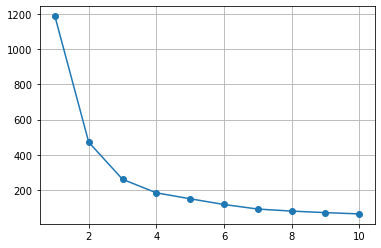

In [23]:
plt.plot(range(1,11), wss, marker = 'o')
plt.grid()
plt.show()

WSS is the sum of the square of the distance of each point from its center in the cluster(sum of squared errors), and this distance can help us calculate what the appropriate of the value of K we can take or can say how many clusters we can make.
Here, through the graphical represention of the graph i can make out that 3 cluster would be optimal for us as this graphn is plotting the points which we find out through wss.

In [24]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df1)
labels = k_means.labels_

In [25]:
df["KMeans_Clus"] = labels
df.head(10)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,H_Clusters,KMeans_Clus
0,Bachevo,417,66,564,1823,2,0
1,Balgarchevo,1485,646,2710,73662,3,1
2,Belasitsa,654,299,1104,27318,2,0
3,Belo_Pole,192,25,573,250,2,0
4,Beslen,43,8,528,22,2,0
5,Bogolin,69,14,527,73,2,0
6,Bogoroditsa,307,69,707,1724,2,0
7,Buchino,10219,1508,7049,449003,1,2
8,Budiltsi,744,115,809,7497,2,0
9,Cherniche,2975,857,1600,153299,3,1


In [26]:
df['KMeans_Clus'].value_counts().sort_index()

0    101
1    101
2     95
Name: KMeans_Clus, dtype: int64

Cluster 0 have 101 states in it, which are lowest in their situation of physical health system & financially as well.

Cluster 1 have 101 states in it, which have average in physical health system & financially as well.

Cluster 2 have 95 states in it, which is having excellent in physical health system & financially as well.

In [27]:
aggdata2=df.groupby('KMeans_Clus').mean()
aggdata2

,Health_indeces1,Health_indices2,Per_capita_income,GDP,H_Clusters
KMeans_Clus,,,,,
0,499.158416,116.356436,693.772277,9428.099010,2.059406
1,2597.089109,783.019802,2464.128713,141264.138614,2.920792
2,4930.884211,1212.336842,3385.852632,385648.589474,1.000000


Here, we can see group of 3 clusters 0 the most lowest group one 1 is the average group and 2 is the most well organized group.

1. "Group 0" is the the group which have the lowest per capita income and GDP out of the other two groups.

2. "Group 1" this group is a decent one in terms of per capita income anf GDP.

3. "Group 2" this group is the most excellent group in terms of per capita income and GDP.

So, according to the dataset we have to make cluster of the states according to their physical health system. so, here we obtain three groups with the lowest, average and the excellent physical health system.  

In [28]:
silhouette_score(df1,labels)

0.5335432108748761

In [29]:
sil_width = silhouette_samples(df1,labels)

In [30]:
df["sil_width"] = sil_width
df.head(5)

,States,Health_indeces1,Health_indices2,Per_capita_income,GDP,H_Clusters,KMeans_Clus,sil_width
0,Bachevo,417,66,564,1823,2,0,0.878852
1,Balgarchevo,1485,646,2710,73662,3,1,0.429639
2,Belasitsa,654,299,1104,27318,2,0,0.690607
3,Belo_Pole,192,25,573,250,2,0,0.876148
4,Beslen,43,8,528,22,2,0,0.862031


## 1.5. Describe cluster profiles for the clusters defined. Recommend different priority based actions that need to be taken for different clusters on the bases of their vulnerability situations according to their Economic and Health Conditions.

In [31]:
Hierarchical_cluster_1 =  aggdata1.T
Hierarchical_cluster_1

H_Clusters,1,2,3
Health_indeces1,4923.545455,401.063158,2481.776699
Health_indices2,1201.646465,104.536842,748.689320
Per_capita_income,3375.141414,680.673684,2347.582524
GDP,377132.474747,5388.768421,136004.699029


In [32]:
Kmeans_cluster_2 =  aggdata2.T
Kmeans_cluster_2

KMeans_Clus,0,1,2
Health_indeces1,499.158416,2597.089109,4930.884211
Health_indices2,116.356436,783.019802,1212.336842
Per_capita_income,693.772277,2464.128713,3385.852632
GDP,9428.099010,141264.138614,385648.589474
H_Clusters,2.059406,2.920792,1.000000


Here, we can see that both the techniques or models gives us the same result 3 clusters. This clusters represent the Groups in which the states belongs in hierarchical clustering we got a group of 1, 2 & 3 and in KNN we got a group of 0, 1 & 2

#### Hierarchical clustering group :

1st is the most Qualified or properly developed one. 

2nd one is the with the one which needs the most development.

3rd one is the one which have a averagely developed health system.

#### KNN Clustering :

0th one is the one which needs the most development in their physical system.

1st one is the average one which needs a tweaking in theirs physical system.

2nd one have the most optimized physical system in theirs states.

So, both groups are same its just that both have been made with different methods otherwise both give us the same result in terms of insights and helps us making decision acoording to it.

## Suggetion : (Just for explanation purposes)

##### Group 1: (Taking as a group which is not so developed one)
 
1.This should be our first priority as the health system over here is not so good.

2.Here, the the population doesnt have a healthy health index as we can derive from the data.

3.We can also see the per capita income and GDP is also not good in these states so financial support could also be provided to 
these cities as this xcan also be a good factor of not so good physical system.

4.People with not a good income will be capable to get them check up in an hospital.

5.Government should direct most of their workforce over these states as the people here are poor and not have the capability to pay their bill whether its in health field or any other field.

6.We can say that most of the people here are sick and are poor.

7.We have to do an all round development in these states as they are in a very bad condition financially wise as well and physical condition wise as well.

##### Group 2: (Taking as the average group)

1.These states also need attention of the government as their physical health and financial health is decent but not good enough.

2.These states should be our 2nd priority on the scale of development.

3.These states have quite a decent system and financially also its quite decnet but we have to work in these states as well because its not up to the mark because people are still getting sick and are not financially sound.

4.We have to develop both the condition of the people over here physically as well and financially as well in this way we can minimize the risk factors and the problems faced by the people.

5.To improve the system over here we have to apply our workforce over these states as well so that the problem can be solved.

##### Group 3: (Taking as the most stable group)
1.Here, we dont need to take any serious measure as here the population have proper health system and are financially sound 

2.Here, incase if some problem is there we need some tweaking in the system.

3.Population in these states are facing serious problems regarding Health and finance.

4.Here, all round development have already been done.
  

## Problem 2: CART-RF-ANN
Mortality Outcomes for Females Suffering Myocardial Infarction
The mifem data frame has 1295 rows and 10 columns. This is a Dataset of females having
coronary heart disease (CHD). you have to predict with the given information whether the female is dead or alive so as to discover important factors that should be considered crucial in the treatment of the disease. Use CART, RF & ANN, and compare the models' performances in train and test sets.

#### Dataset for Problem 2: mifem.csv

## Data Dictionary for mifem.csv :
1. Outcome: mortality outcome: a factor with levels live, dead
2. Age: age at onset
3. Yronset: year of onset (The year of onset is the year on which an individual acquires,
develops, or first experiences a condition or symptoms of a disease or disorder)
4. Premi: previous myocardial infarction event, a factor with levels y, n, nk not known
5. Smstat: smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not
known
6. Diabetes: a factor with levels y, n, nk not known
7. Highbp: high blood pressure, a factor with levels y, n, nk not known
8. Hichol: high cholesterol, a factor with levels y, n for yes and no
9. Angina: a factor with levels y, n, nk not known
10. Stroke: a factor with levels y, n, nk not known



## 2.1. Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition. 
#### check, write an inference on it.


In [33]:
chd = pd.read_csv('Downloads/mifem-1 (3).csv')
chd.head()

,Unnamed: 0,Unnamed: 0.1,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,0,1,live,63,85,n,x,n,y,y,n,n
1,1,6,live,55,85,n,c,n,y,y,n,n
2,2,8,live,68,85,y,nk,nk,y,y,y,n
3,3,10,live,64,85,n,x,n,y,n,y,n
4,4,11,dead,67,85,n,nk,nk,nk,y,nk,nk


In [34]:
chd.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1, inplace = True)
chd.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,live,63,85,n,x,n,y,y,n,n
1,live,55,85,n,c,n,y,y,n,n
2,live,68,85,y,nk,nk,y,y,y,n
3,live,64,85,n,x,n,y,n,y,n
4,dead,67,85,n,nk,nk,nk,y,nk,nk


In [35]:
chd.iloc[:,1:3].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1295.0,60.922008,7.042327,35.0,57.0,63.0,66.0,69.0
yronset,1295.0,88.785328,2.553647,85.0,87.0,89.0,91.0,93.0


Here, as we can see in the table only two variables have numeric value thats why i have only described those two variables and the other variables are categorical which will converted into numeric form in further process.

In [36]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outcome   1295 non-null   object
 1   age       1295 non-null   int64 
 2   yronset   1295 non-null   int64 
 3   premi     1295 non-null   object
 4   smstat    1295 non-null   object
 5   diabetes  1295 non-null   object
 6   highbp    1295 non-null   object
 7   hichol    1295 non-null   object
 8   angina    1295 non-null   object
 9   stroke    1295 non-null   object
dtypes: int64(2), object(8)
memory usage: 101.3+ KB


In [37]:
chd.duplicated().sum()

75

In [38]:
chd[chd.iloc[:,0:11].duplicated() == True]

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
46,live,56,85,n,n,n,y,y,y,n
66,dead,69,85,nk,nk,nk,nk,y,nk,nk
68,live,64,85,n,x,n,y,n,y,n
70,live,57,85,n,c,n,n,n,n,n
73,live,66,85,n,n,n,y,n,n,n
...,...,...,...,...,...,...,...,...,...,...
1273,live,66,93,n,n,n,y,y,n,n
1278,live,65,93,n,c,n,n,y,n,n
1283,live,66,93,n,n,n,y,y,n,n
1285,live,65,93,n,x,n,n,n,n,n


In [39]:
chd.isnull().sum()

outcome     0
age         0
yronset     0
premi       0
smstat      0
diabetes    0
highbp      0
hichol      0
angina      0
stroke      0
dtype: int64

### OUTCOME (mortality outcome: a factor with levels live, dead)

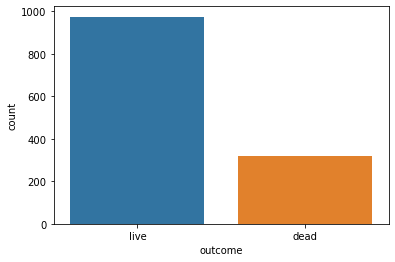

In [40]:
sns.countplot(data = chd, x = 'outcome');

In [41]:
chd.outcome.value_counts()

live    974
dead    321
Name: outcome, dtype: int64

### AGE (age at onset)

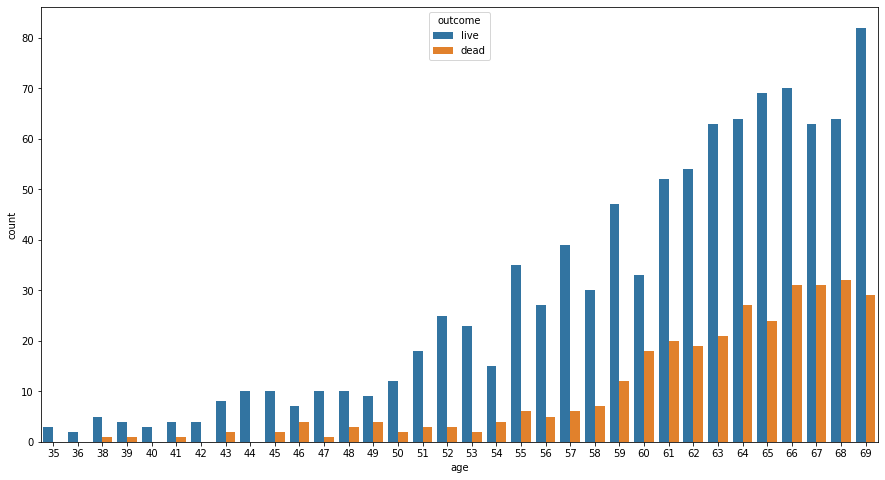

In [42]:
plt.figure(figsize =(15,8))
sns.countplot(data = chd, x = 'age', hue = 'outcome');

In [43]:
pd.crosstab(index=chd["outcome"], columns=chd["age"], margins = True)

age,35,36,38,39,40,41,42,43,44,45,...,61,62,63,64,65,66,67,68,69,All
outcome,,,,,,,,,,,,,,,,,,,,,
dead,0,0,1,1,0,1,0,2,0,2,...,20,19,21,27,24,31,31,32,29,321
live,3,2,5,4,3,4,4,8,10,10,...,52,54,63,64,69,70,63,64,82,974
All,3,2,6,5,3,5,4,10,10,12,...,72,73,84,91,93,101,94,96,111,1295


1. In this we can see how many females lost their lives and how many lived in respect to their age. 

2. Total number of females are 321 who lost their life due to myocardial infarction.

3. Total number of females are 974 who lived through this condition.

### YRONSET - year of onset (The year of onset is the year on which an individual acquires,develops, or first experiences a condition or symptoms of a disease or disorder)


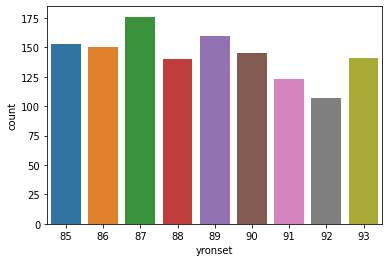

In [44]:
sns.countplot(data = chd, x = 'yronset');

In [45]:
chd.yronset.value_counts()

87    176
89    160
85    153
86    150
90    145
93    141
88    140
91    123
92    107
Name: yronset, dtype: int64

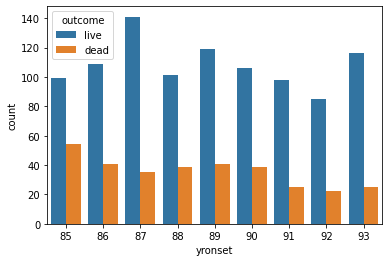

In [46]:
sns.countplot(data = chd, x = 'yronset', hue = 'outcome');

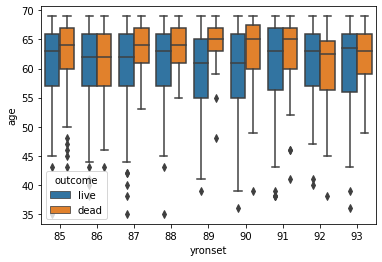

In [47]:
sns.boxplot(data = chd, x= 'yronset', y='age', hue = 'outcome');

In [48]:
pd.crosstab(index=chd["outcome"], columns=chd["yronset"], margins = True)

yronset,85,86,87,88,89,90,91,92,93,All
outcome,,,,,,,,,,
dead,54,41,35,39,41,39,25,22,25,321
live,99,109,141,101,119,106,98,85,116,974
All,153,150,176,140,160,145,123,107,141,1295


1. In this we can see how many females suffering from myocardial infarction died and lived according to a particular year from the total females patients in a year.

2. Total no of females here are 1295 from that 321 lost their lives and 974 survived through this condtion.

3. Also we can see in year 85 from total of 153 patients 54 passed away and 99 lived. we can see this with all the years with respect to outcomes of every patient who is suffering from myocardial infarction.

### PREMI (previous myocardial infarction event, a factor with levels y, n, nk not known)

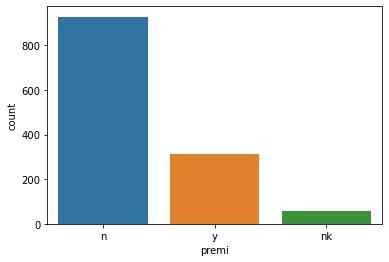

In [49]:
sns.countplot(data = chd, x = 'premi');

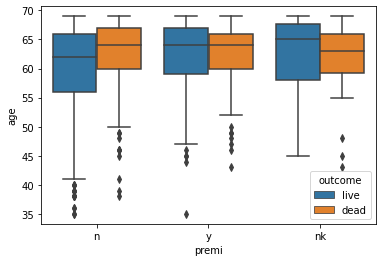

In [50]:
sns.boxplot(data = chd, x= 'premi' , y = 'age', hue = 'outcome');

In [51]:
chd.premi.value_counts()

n     928
y     311
nk     56
Name: premi, dtype: int64

### SMSTAT (smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not known)


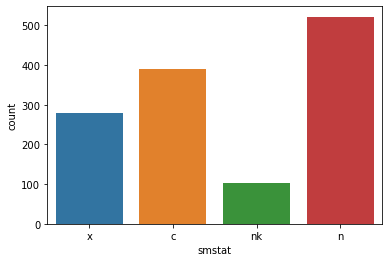

In [52]:
sns.countplot(data= chd, x = 'smstat');

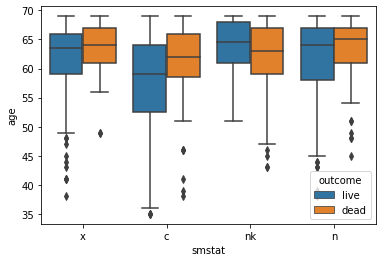

In [53]:
sns.boxplot(data = chd, x= 'smstat', y = 'age', hue = 'outcome');

In [54]:
chd.smstat.value_counts()

n     522
c     390
x     280
nk    103
Name: smstat, dtype: int64

### DIABETES (a factor with levels y, n, nk not known)

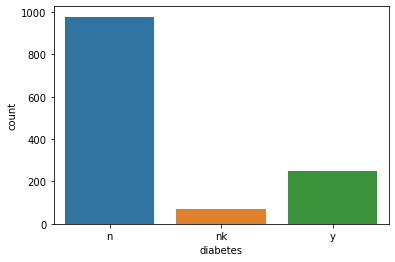

In [55]:
sns.countplot(data = chd, x = 'diabetes');

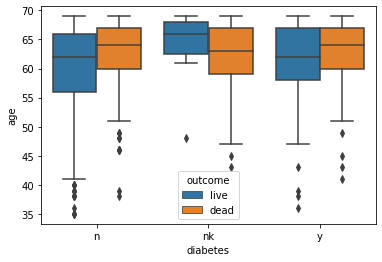

In [56]:
sns.boxplot(data = chd, x= 'diabetes', y = 'age', hue = 'outcome');

In [57]:
chd.diabetes.value_counts()

n     978
y     248
nk     69
Name: diabetes, dtype: int64

### HIGHBP (high blood pressure, a factor with levels y, n, nk not known)

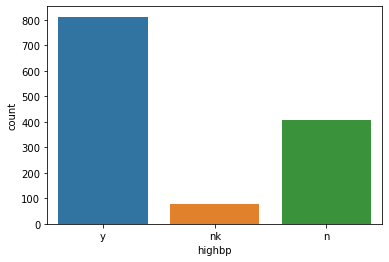

In [58]:
sns.countplot(data = chd, x= 'highbp');

In [59]:
chd.highbp.value_counts()

y     813
n     406
nk     76
Name: highbp, dtype: int64

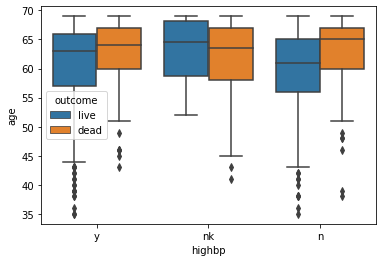

In [60]:
sns.boxplot(data = chd, x= 'highbp', y = 'age', hue = 'outcome');

### HICHOL (high cholesterol, a factor with levels y, n for yes and no)

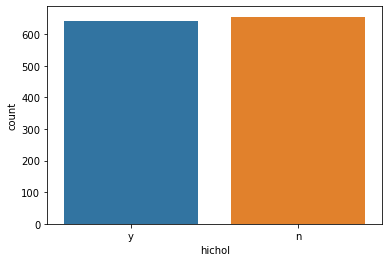

In [61]:
sns.countplot(data = chd, x = 'hichol');

In [62]:
chd.hichol.value_counts()

n    655
y    640
Name: hichol, dtype: int64

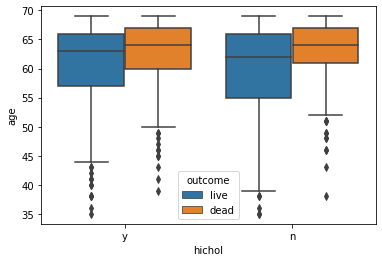

In [63]:
sns.boxplot(data = chd, x= 'hichol', y = 'age', hue = 'outcome');

### ANGINA (a factor with levels y, n, nk not known)

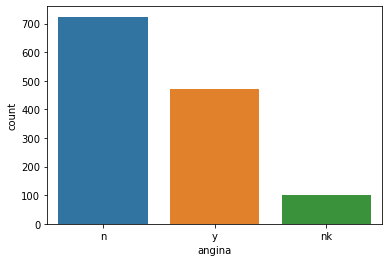

In [64]:
sns.countplot(data =chd, x= 'angina');

In [65]:
chd.angina.value_counts()

n     724
y     472
nk     99
Name: angina, dtype: int64

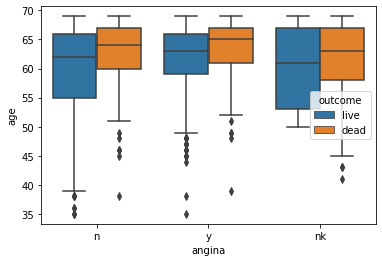

In [66]:
sns.boxplot(data =chd, x='angina', y = 'age', hue = 'outcome');

### STROKE (a factor with levels y, n, nk not known)

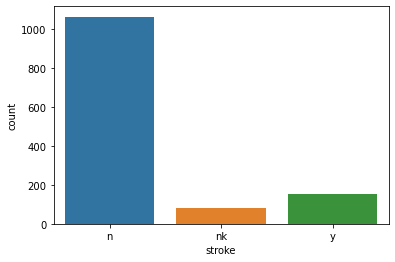

In [67]:
sns.countplot(data = chd, x= 'stroke');

In [68]:
chd.stroke.value_counts()

n     1063
y      153
nk      79
Name: stroke, dtype: int64

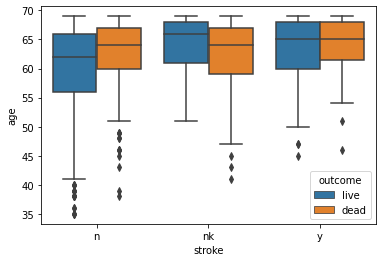

In [69]:
sns.boxplot(data = chd, x = 'stroke', y = 'age', hue = 'outcome');

## 2.2. Encode the data (having string values) for Modelling. Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.


In [70]:
for feature in chd.columns: 
    if chd[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(chd[feature].unique()))
        print(pd.Categorical(chd[feature].unique()).codes)
        chd[feature] = pd.Categorical(chd[feature]).codes



feature: outcome
['live', 'dead']
Categories (2, object): ['dead', 'live']
[1 0]


feature: premi
['n', 'y', 'nk']
Categories (3, object): ['n', 'nk', 'y']
[0 2 1]


feature: smstat
['x', 'c', 'nk', 'n']
Categories (4, object): ['c', 'n', 'nk', 'x']
[3 0 2 1]


feature: diabetes
['n', 'nk', 'y']
Categories (3, object): ['n', 'nk', 'y']
[0 1 2]


feature: highbp
['y', 'nk', 'n']
Categories (3, object): ['n', 'nk', 'y']
[2 1 0]


feature: hichol
['y', 'n']
Categories (2, object): ['n', 'y']
[1 0]


feature: angina
['n', 'y', 'nk']
Categories (3, object): ['n', 'nk', 'y']
[0 2 1]


feature: stroke
['n', 'nk', 'y']
Categories (3, object): ['n', 'nk', 'y']
[0 1 2]


In [71]:
chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outcome   1295 non-null   int8 
 1   age       1295 non-null   int64
 2   yronset   1295 non-null   int64
 3   premi     1295 non-null   int8 
 4   smstat    1295 non-null   int8 
 5   diabetes  1295 non-null   int8 
 6   highbp    1295 non-null   int8 
 7   hichol    1295 non-null   int8 
 8   angina    1295 non-null   int8 
 9   stroke    1295 non-null   int8 
dtypes: int64(2), int8(8)
memory usage: 30.5 KB


In [72]:
chd.head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,63,85,0,3,0,2,1,0,0
1,1,55,85,0,0,0,2,1,0,0
2,1,68,85,2,2,1,2,1,2,0
3,1,64,85,0,3,0,2,0,2,0
4,0,67,85,0,2,1,1,1,1,1


In [74]:
X = chd.drop("outcome", axis=1)

y = chd.pop("outcome")

In [75]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [76]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (906, 9)
X_test (389, 9)
train_labels (906,)
test_labels (389,)


## Decision Tree Classifier

In [102]:
param_grid = {
    'max_depth': [0,1, 2, 5],
    'min_samples_leaf': [0, 5, 10],
    'min_samples_split': [0, 5 ,15]
}

dt_model = DecisionTreeClassifier()

grid_search1 = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [103]:
grid_search1.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [0, 1, 2, 5],
                         'min_samples_leaf': [0, 5, 10],
                         'min_samples_split': [0, 5, 15]})

In [104]:
grid_search1.best_params_

{'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}

In [105]:
best_grid1 = grid_search1.best_estimator_
best_grid1

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

In [106]:
ytrain_predict1 = best_grid1.predict(X_train)
ytest_predict1 = best_grid1.predict(X_test)

In [107]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid1, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

http://www.webgraphviz.com

## Random Forest Classifier

In [147]:
param_grid = {
    'max_depth': [8,15,20],
    'max_features': [5, 10],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,60,70],
    'n_estimators': [95,100,150]
}

rfcl = RandomForestClassifier()

grid_search2 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [148]:
grid_search2.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 15, 20], 'max_features': [5, 10],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 60, 70],
                         'n_estimators': [95, 100, 150]})

In [149]:
grid_search2.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 95}

In [150]:
best_grid2 = grid_search2.best_estimator_

In [151]:
ytrain_predict2 = best_grid2.predict(X_train)
ytest_predict2 = best_grid2.predict(X_test)

## MLP Classifier (Artificial Neural Network)

In [152]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [156]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01,0.001],
    'max_iter' : [200,500]
}

nncl = MLPClassifier()

grid_search3 = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [157]:
grid_search3.fit(X_trains, train_labels)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(100, 100, 100)],
                         'max_iter': [200, 500], 'solver': ['sgd', 'adam'],
                         'tol': [0.1, 0.01, 0.001]})

In [158]:
grid_search3.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [159]:
best_grid3 = grid_search3.best_estimator_

In [160]:
ytrain_predict3 = best_grid3.predict(X_trains)
ytest_predict3 = best_grid3.predict(X_tests)

## 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve, and get ROC_AUC score for each model.


## Decision Tree
### Classification Matrix

In [161]:
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.87      0.24      0.38       216
           1       0.81      0.99      0.89       690

    accuracy                           0.81       906
   macro avg       0.84      0.61      0.63       906
weighted avg       0.82      0.81      0.77       906



In [162]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.95      0.17      0.29       105
           1       0.76      1.00      0.87       284

    accuracy                           0.77       389
   macro avg       0.86      0.58      0.58       389
weighted avg       0.81      0.77      0.71       389



### Confusion Matrix

In [163]:
confusion_matrix(train_labels,ytrain_predict1)

array([[ 52, 164],
       [  8, 682]], dtype=int64)

In [164]:
confusion_matrix(test_labels, ytest_predict1)

array([[ 18,  87],
       [  1, 283]], dtype=int64)

### Train & Test Label Score (Accuracy)

In [165]:
cart_train_acc=best_grid1.score(X_train,train_labels)
cart_train_acc

0.8101545253863135

In [166]:
cart_test_acc=best_grid1.score(X_test,test_labels)
cart_test_acc

0.7737789203084833

### ROC curve & ROC_AUC score 

AUC: 0.689


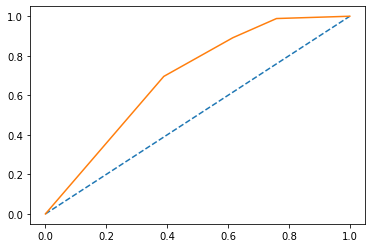

In [167]:
# predict probabilities
probs = best_grid1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.619


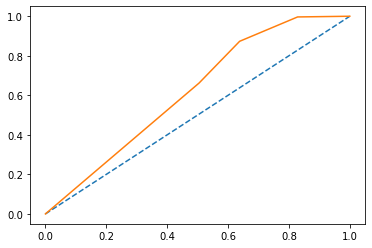

In [168]:
# predict probabilities
probs = best_grid1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [169]:
cart_metrics=classification_report(train_labels, ytrain_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.81
cart_train_recall  0.99
cart_train_f1  0.89


In [170]:
cart_metrics=classification_report(test_labels, ytest_predict1,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.76
cart_test_recall  1.0
cart_test_f1  0.87


## Random Forest

In [171]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.93      0.24      0.38       216
           1       0.81      0.99      0.89       690

    accuracy                           0.81       906
   macro avg       0.87      0.62      0.64       906
weighted avg       0.84      0.81      0.77       906



In [172]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.95      0.19      0.32       105
           1       0.77      1.00      0.87       284

    accuracy                           0.78       389
   macro avg       0.86      0.59      0.59       389
weighted avg       0.82      0.78      0.72       389



### Confusion Matrix

In [173]:
confusion_matrix(train_labels,ytrain_predict2)

array([[ 52, 164],
       [  4, 686]], dtype=int64)

In [174]:
confusion_matrix(test_labels,ytest_predict2)

array([[ 20,  85],
       [  1, 283]], dtype=int64)

### Train & Test Label Score (Accuracy)

In [175]:
rf_train_acc=best_grid2.score(X_train,train_labels)
rf_train_acc

0.8145695364238411

In [176]:
rf_test_acc=best_grid2.score(X_test,test_labels)
rf_test_acc

0.7789203084832905

### ROC curve & ROC_AUC score

Area under Curve is 0.8171967257112186


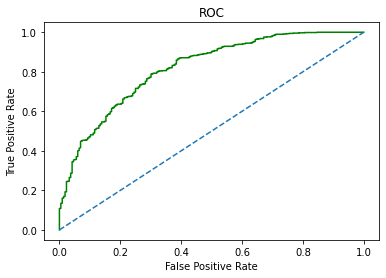

In [177]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid2.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid2.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.72060697518444


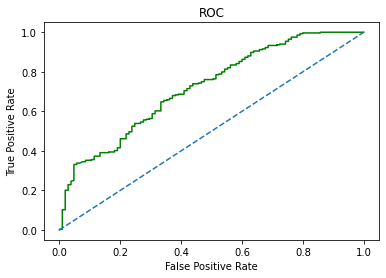

In [178]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid2.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid2.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [179]:
cart_metrics=classification_report(train_labels, ytrain_predict2,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.81
rf_train_recall 0.99
rf_train_f1  0.89


In [180]:
rf_metrics=classification_report(test_labels, ytest_predict2,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.77
rf_test_recall  1.0
rf_test_f1  0.87


## Neural Network

In [181]:
print(classification_report(train_labels,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.83      0.27      0.41       216
           1       0.81      0.98      0.89       690

    accuracy                           0.81       906
   macro avg       0.82      0.63      0.65       906
weighted avg       0.82      0.81      0.77       906



In [182]:
print(classification_report(test_labels,ytest_predict3))

              precision    recall  f1-score   support

           0       0.70      0.18      0.29       105
           1       0.76      0.97      0.85       284

    accuracy                           0.76       389
   macro avg       0.73      0.58      0.57       389
weighted avg       0.75      0.76      0.70       389



### Confusion Matrix

In [183]:
confusion_matrix(train_labels,ytrain_predict3)

array([[ 58, 158],
       [ 12, 678]], dtype=int64)

In [184]:
confusion_matrix(test_labels,ytest_predict3)

array([[ 19,  86],
       [  8, 276]], dtype=int64)

### Train & Test Label Score (Accuracy)

In [185]:
nn_train_acc=best_grid3.score(X_trains,train_labels) 
nn_train_acc

0.8123620309050773

In [186]:
nn_test_acc=best_grid3.score(X_tests,test_labels) 
nn_test_acc

0.7583547557840618

### ROC curve & ROC_AUC score

Area under Curve is 0.8173544015029522


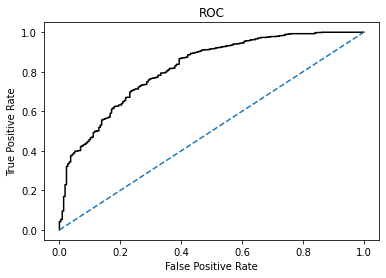

In [187]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid3.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid3.predict_proba(X_trains)[:,1])
print('Area under Curve is', nn_train_auc)

Area under Curve is 0.6914654594232059


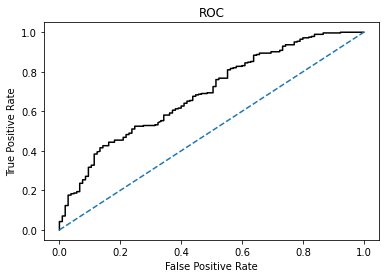

In [188]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid3.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid3.predict_proba(X_tests)[:,1])
print('Area under Curve is', nn_test_auc)

In [189]:
nn_metrics=classification_report(train_labels, ytrain_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.81
nn_train_recall  0.98
nn_train_f1  0.89


In [190]:
nn_metrics=classification_report(test_labels, ytest_predict3,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.76
nn_test_recall  0.97
nn_test_f1  0.85


## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


In [191]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.81,0.77,0.81,0.78,0.81,0.76
AUC,0.69,0.62,0.82,0.72,0.82,0.69
Recall,0.99,1.00,0.99,1.00,0.98,0.97
Precision,0.81,0.76,0.81,0.77,0.81,0.76
F1 Score,0.89,0.87,0.89,0.87,0.89,0.85


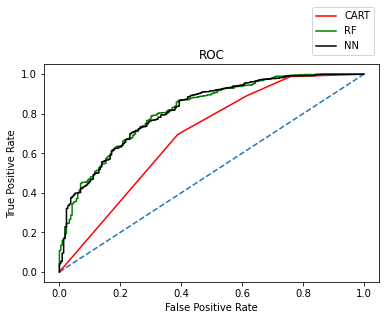

In [192]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

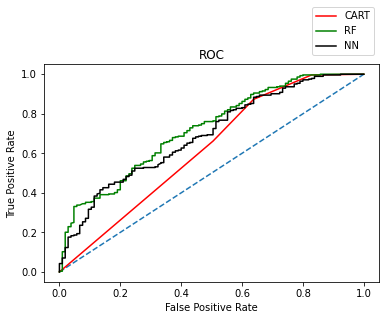

In [193]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right');

## 2.5 Inference: Basis on these predictions, what are the insights and recommendations?

Out of the 3 models, Random Forest has slightly better performance than the Cart and Neural network model interms of overall accuracy.

Overall all the 3 models are reasonaly stable enough to be used for making any future predictions. From Cart and Random Forest Model.Since its a health care domain and a balanced dataset we can consider the recall metric alongside over all accuracy to be important in this case study, as much we want the model to preict positives correcly but it should be accurate about the negatives as well, so that it can help the hospital to have a clear distinction between the patients.

High recall, low precision: This means that most of the positive examples are correctly recognized but there are a lot of false positives.

Low recall, high precision: This shows that we miss a lot of positive examples but those we predict as positive are indeed positive

In, this we need a properly balanced models so that we can keep all the patients on same scale as its a matter of life and death 
in this we need to have a proper understanding of the data otherwise it will be very harmful for the patients.

Here, we can see the overall accuracies of the model so as we know higher the accuracy of the model lesser the false prediction if we are looking for accuracy in our data then we can say that we have got a pretty much decent accuracy from the other two models we can random forest have the highest accuracy among all other models that means its making less false prediction of the other two, our model are also giving recall score near to perfect so we can expect some false negatives as well 